<a href="https://colab.research.google.com/github/zulfianrahma/Fuel-Efficiency-Prediction-of-Vehicle-using-Sklearn-Pipeline/blob/main/Fuel_Efficiency_of_Vehicles_using_Sklearn_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Collecting data from UCL ML repository

In [1]:
!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

--2024-04-07 07:11:35--  http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘auto-mpg.data.1’

auto-mpg.data.1         [ <=>                ]  29.58K  --.-KB/s    in 0.1s    

2024-04-07 07:11:36 (228 KB/s) - ‘auto-mpg.data.1’ saved [30286]



- Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Read and load the file into a dataframe using the `read_csv()` method

In [3]:
# defining the column names
cols = ['MPG',
        'Cylinders',
        'Displacement',
        'Horsepower',
        'Weight',
        'Acceleration',
        'Model Year',
        'Origin']

# reading the .data file using pandas
df = pd.read_csv('./auto-mpg.data',         # specifies the path to the data file
                 names=cols,                # specifies the colomn names to be used for the dataframe
                 na_values = "?",           # specifies the string or list of strings to recognize as NaN (not a number)
                 comment = '\t',            # indicates that any lines in the dataframe that start with a tab character (\t) should be ignored
                 sep= " ",                  # specifies the delimiter that separates values in the data file
                 skipinitialspace=True      # indicates whether whitespace after the delimiter should be ignored
                 )

#making a copy of the dataframe
data = df.copy()

- Present the 10 first rows of the dataframe

In [4]:
data.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,1


## Problem Statement
- The data contains the MPG (Mile Per Gallon) variable which is continuous data and tells us about the efficiency of fuel consumption of a vehicle in the 70s and 80s.
- Our aim here is to predict the MPG value for a vehicle, given that we have other attributes of that vehicle.

# 2. Exploratory Data Analysis

- check the data type of colomns

In [5]:
# checking the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


- check summary statistics of quantitative variables

In [6]:
# summary statistics of quantitative variables
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


- check for null values

In [7]:
# checking for all null values
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

The horsepower column has 6 missing values. We will solve that problem later with Pipeline.

- check for outliers in horsepower colomn

<Axes: xlabel='Horsepower'>

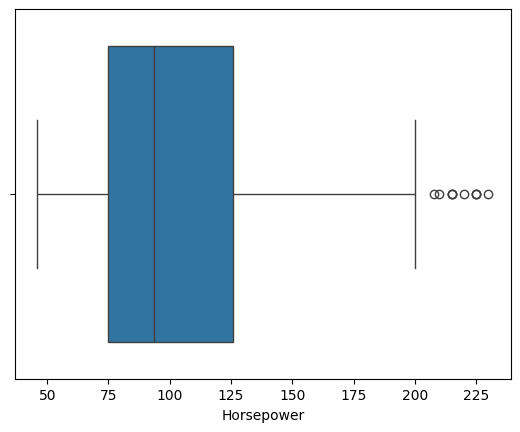

In [8]:
# looking at horsepower box plot
sns.boxplot(x = data['Horsepower'])

- look for the category distribution in categorical colomns

In [9]:
# category distribution
print("Distribution ratio of data",data['Cylinders'].value_counts() / len(data))
print('\nDistribution of data',data['Cylinders'].value_counts())

print('Total data is', len(data))

Distribution ratio of data Cylinders
4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: count, dtype: float64

Distribution of data Cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64
Total data is 398


In [10]:
# category distribution
print("Distribution ratio of data",data['Origin'].value_counts() / len(data))
print('\nDistribution of data',data['Origin'].value_counts())

print('Total data is', len(data))

Distribution ratio of data Origin
1    0.625628
3    0.198492
2    0.175879
Name: count, dtype: float64

Distribution of data Origin
1    249
3     79
2     70
Name: count, dtype: int64
Total data is 398


- Plot for correlation

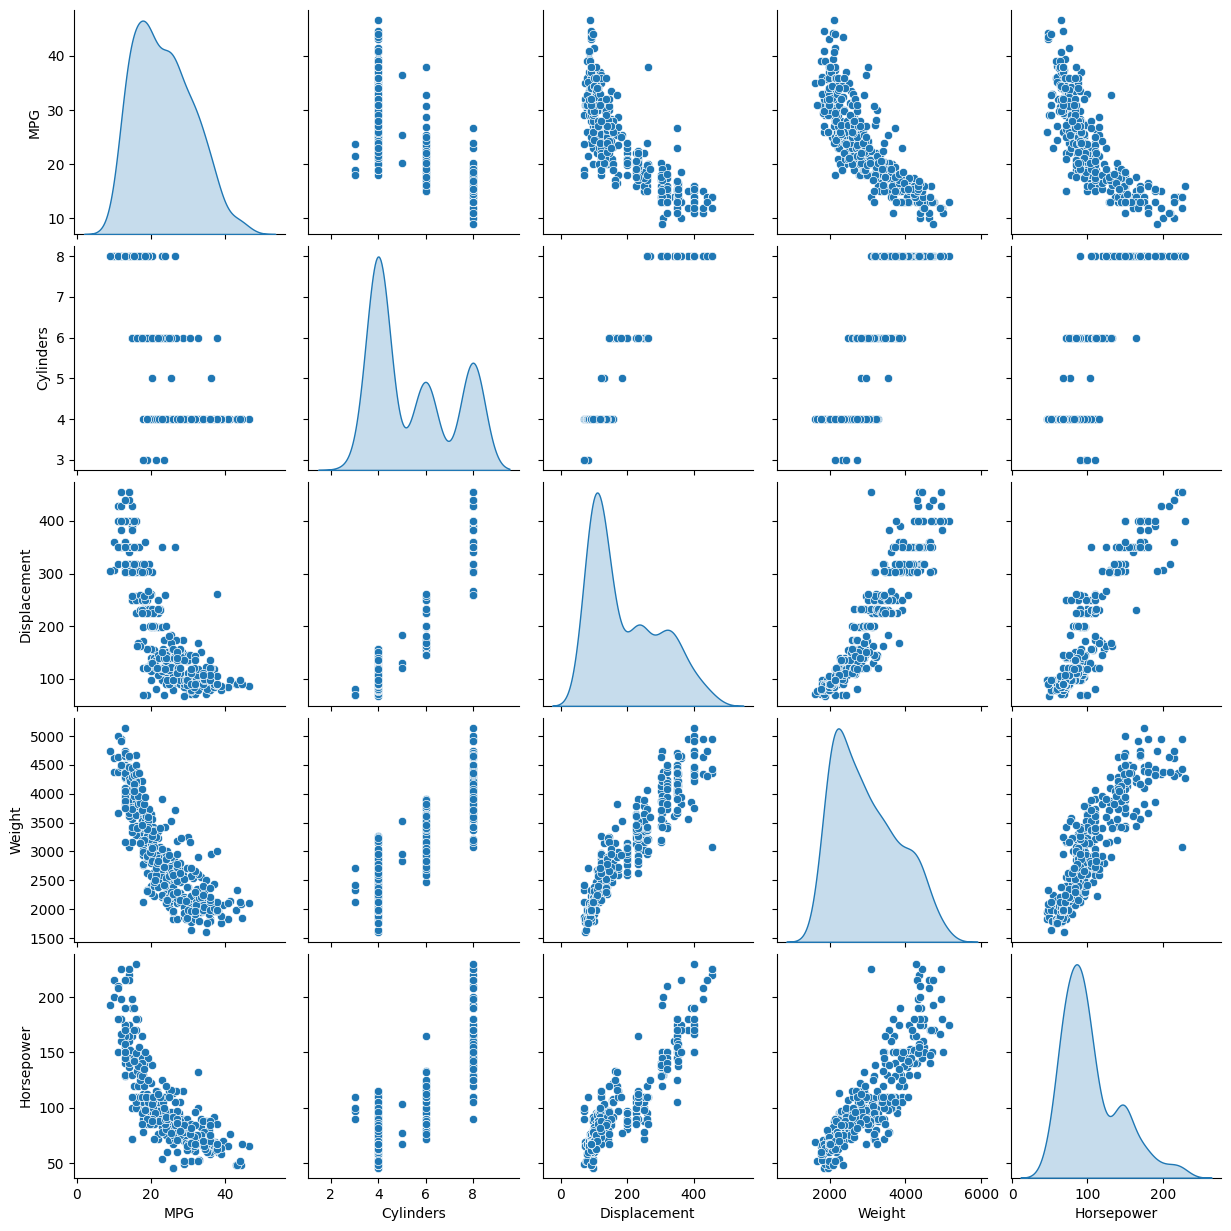

In [11]:
##pairplots to get an intuition of potential correlations

sns.pairplot(data[["MPG", "Cylinders", "Displacement", "Weight", "Horsepower"]],
             diag_kind="kde"         # specifies the type of plot. "kde" stands for Kernel Density Estimate, a way to estimate the probality density function of a random variable
             )

- make new variables based on the colomn of dataframe

In [12]:
data['displacement_on_power'] = data['Displacement'] / data['Horsepower']
data['weight_on_cylinder'] = data['Weight'] / data['Cylinders']
data['acceleration_on_power'] = data['Acceleration'] / data['Horsepower']
data['acceleration_on_cylinder'] = data['Acceleration'] / data['Horsepower']

- testing new variables by checking their correlation

In [13]:
corr_matrix = data.corr()

# calculates the correlation coefficients between the colomn 'MPG' and all other colomns
corr_matrix['MPG'].sort_values(ascending=False)

MPG                         1.000000
acceleration_on_power       0.710556
acceleration_on_cylinder    0.710556
Model Year                  0.579267
Origin                      0.563450
Acceleration                0.420289
weight_on_cylinder         -0.020778
displacement_on_power      -0.572176
Cylinders                  -0.775396
Horsepower                 -0.778427
Displacement               -0.804203
Weight                     -0.831741
Name: MPG, dtype: float64

We found `acceleration_on_power` and `acceleration_on_cylinder` as two new variables which turned out to be more positively correlated than the original variables, which is:
- acceleration
- horsepower
- cylinder

# 3. Data Preparation using Sklearn Pipelines

One of the most important aspects of Data Preparation is that we have to keep automating our steps in the form of functions and classes. This make it easier for us to integrate the methods and pipelines into the main product.

This is one of the first things we should do, as we want to test our final model on unseen/unbiased data.

There are many ways to split the data into training and testing sets, but we want our test set to represent the overall population and not just a few specific categories.

Thus, instead of using simple and common `train_test_split()` method for sklearn, we use `stratified sampling`.

> **Stratified Sampling** - We create homogeneous subgroups called strata from the overall population and sample the right number of instances to each stratum to ensure that the test set is representative of overall population.  

We saw how the data is distributed over each category (Cylinder and Origin colomns). We are using the Cylinder colomn to create the strata.

- create the strata based on Cylinder colomn distribution

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1,        # specifies the number of splits to generate
                               test_size = 0.2,     # determines the size of the testing set relative to the whole dataset
                               random_state = 42    # used to initialize the random number generator. Setting it to a specific value means that the split will always be the same whenever the code is run with the same dataset
                               )

data = df.copy()

for train_index, test_index in split.split(data, data['Cylinders']):
  strat_train_set = data.loc[train_index]   # selects the rows form the original dataset corresponding to the indices of the training set and assign the to a new dataframe
  strat_test_set = data.loc[test_index]     # selects the rows form the original dataset corresponding to the indices of the test set and assign the to a new dataframe

- check the distribution in training set

In [15]:
print("Distribution ratio of training data \n",strat_train_set['Cylinders'].value_counts() / len(strat_train_set))
print('\nDistribution of training data \n',strat_train_set['Cylinders'].value_counts())

print('Total training data is', len(strat_train_set))

Distribution ratio of training data 
 Cylinders
4    0.512579
8    0.257862
6    0.210692
5    0.009434
3    0.009434
Name: count, dtype: float64

Distribution of training data 
 Cylinders
4    163
8     82
6     67
5      3
3      3
Name: count, dtype: int64
Total training data is 318


- check the distribution in testing set

In [16]:
print("Distribution ratio of test data \n",strat_test_set['Cylinders'].value_counts() / len(strat_test_set))
print('\nDistribution of test data \n',strat_test_set['Cylinders'].value_counts())

print('Total test data is', len(strat_test_set))

Distribution ratio of test data 
 Cylinders
4    0.5125
8    0.2625
6    0.2125
3    0.0125
Name: count, dtype: float64

Distribution of test data 
 Cylinders
4    41
8    21
6    17
3     1
Name: count, dtype: int64
Total test data is 80


- segregating target and feature variables at training data

In [29]:
train_features = strat_train_set.drop('MPG', axis = 1 )
train_labels = strat_train_set['MPG'].copy()
train_features

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,3
151,4,79.0,67.0,2000.0,16.0,74,2
388,4,156.0,92.0,2585.0,14.5,82,1
48,6,250.0,88.0,3139.0,14.5,71,1
114,4,98.0,90.0,2265.0,15.5,73,2
...,...,...,...,...,...,...,...
147,4,90.0,75.0,2108.0,15.5,74,2
156,8,400.0,170.0,4668.0,11.5,75,1
395,4,135.0,84.0,2295.0,11.6,82,1
14,4,113.0,95.0,2372.0,15.0,70,3


- make a function to preprocessing the Origin colomn

In [30]:
def preprocess_origin_colomns(data):
  preprocessed_data = data.copy()
  preprocessed_data['Origin'] = preprocessed_data['Origin'].map({1: 'India',
                                                                 2: 'USA',
                                                                 3: 'Germany'})
  return preprocessed_data

## Adding Atrributes using BaseEstimator and Transformer

In order to make changes to datasets and create new variables, Sklearn offers the `BaseEstimator` class. Using it, we can develop new features by defining our own class.

- make new class based on `BaseEstimator` class to add two new features (based on EDA step):
  - `acceleration_on_power` - Acceleration divided by Horsepower
  - `acceleration_on_cylinder` - Acceleration divided by Cylinders

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin

acc_idx, hpower_idx, cyl_idx = 4, 2, 0

# custom class inheriting the BaseEstimator and TransformerMixin
class CustomAttributeAdder(BaseEstimator, TransformerMixin):
  def __init__(self, acc_on_power = True):
    self.acc_on_power = acc_on_power                      # new optional variable if served

  def fit(self, X, y = None):
    return self                                           # nothing else to do

  def transform(self, X):
    acc_on_cyl = X[:, acc_idx] / X[:, cyl_idx]            # make acc_on_cyl variable
    if self.acc_on_power:
      acc_on_power = X[:, acc_idx] / X[:, hpower_idx]     # make acc_on_power variable
      return np.c_[X, acc_on_power, acc_on_cyl]

    return np.c_[X, acc_on_cyl]


## Setting up Data Transformation Pipeline

We want to automate as much as possible. Sklearn offers a great number of classes and methods to develop such automated pipelines of data transformations.
The major transformations are to be performed on numerical colomns, so let's create the numerical pipelines using the `Pipeline` class

- Make numerical pipeline

In [20]:
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [21]:
def num_pipeline_transformer(data):
  '''
  Function to process numerical transformations
  Arguments:
    data: original dataframe
  Returns:
    num_attrs: numerical dataframe
    num_pipeline: numerical pipeline object
  '''
  numerics = ['float64', 'int64']

  num_attrs = data.select_dtypes(include = numerics)

  num_pipeline = Pipeline([
      ('imputer', SimpleImputer(strategy = 'median')),
      ('attrs_adder', CustomAttributeAdder()),
      ('std_scaler', StandardScaler())            # scale the values before feeding them to ML model
  ])

  return num_attrs, num_pipeline

- Combined Pipeline for both numerical and categorical columns

In [22]:
# Transform different columns or subsets using ColumnTransformer
from sklearn.compose import ColumnTransformer

def pipeline_transformer(data):
  '''
  Complete transformation pipeline for both numerical and categorical data.
  Argument:
    data: original dataframe
  Returns:
    prepared_data: transformed_data (ready to use)
  '''
  cat_attrs = ['Origin']
  num_attrs, num_pipeline = num_pipeline_transformer(data)
  complete_pipeline = ColumnTransformer([
      ('num', num_pipeline, list(num_attrs)),
      ('cat', OneHotEncoder(), cat_attrs)
  ])

  prepared_data = complete_pipeline.fit_transform(data)
  return prepared_data

## Automation

With these classes and functions defined, we now have to integrate them into single flow.

- retrieve the processed data using training data

In [36]:
preprocessed_df = preprocess_origin_colomns(train_features)
prepared_data_train = pipeline_transformer(preprocessed_df)
prepared_data_train[0]

array([-0.85657842, -1.07804475, -1.15192977, -1.17220298,  1.21586943,
       -0.54436373,  1.70952741,  1.29565517,  1.        ,  0.        ,
        0.        ])

# 4. Select, Train, and Evaluate ML Models

Since this is a regression problem, I chose to train the following models:
1. Linear Regression
2. Decision Tree Regressor
3. Random Forest Regressor
4. SVM Regressor

The process for each models:
1. Create an instance of the model class
2. Train the model using the fit() method
3. Make predictions by first passing the data through pipeline transformer
4. Evaluating the model using Root Mean Squared Error (typical performance metric for regression problems)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

- Make pipeline for each machine learning model

In [39]:
# Define the pipeline for Linear Regression
linear_pipeline = Pipeline([
    ('linear_reg', LinearRegression())  # Linear Regression model
])

# Define the pipeline for Decision Tree Regression
dt_pipeline = Pipeline([
    ('dt_reg', DecisionTreeRegressor())  # Decision Tree Regression model
])

# Define the pipeline for Random Forest Regression
rf_pipeline = Pipeline([
    ('rf_reg', RandomForestRegressor())  # Random Forest Regression model
])

# Define the pipeline for SVR
svr_pipeline = Pipeline([
    ('svr_reg', SVR())  # Support Vector Regression model
])

- combine all machine learning models into single pipeline

In [40]:
# List of pipelines
model_pipelines = [
    ('Linear Regression', linear_pipeline),
    ('Decision Tree', dt_pipeline),
    ('Random Forest', rf_pipeline),
    ('SVR', svr_pipeline)
]

- segregating target and feature variables at training and testing data

In [44]:
train_features = strat_train_set.drop('MPG', axis = 1 )
train_labels = strat_train_set['MPG'].copy()

test_features = strat_test_set.drop('MPG', axis = 1)
test_labels = strat_test_set['MPG'].copy()

- preprocessed each training and testing data

In [45]:
preprocessed_df_train = preprocess_origin_colomns(train_features)
prepared_data_train = pipeline_transformer(preprocessed_df_train)

preprocessed_df_test = preprocess_origin_colomns(test_features)
prepared_data_test = pipeline_transformer(preprocessed_df_test)

- train and evaluate model with mean squared error as evaluation metric

In [46]:
# Dictionary to store MSE for each model
mse_scores = {}

# Evaluate models
for name, pipeline in model_pipelines:

    print(f"Training {name}...")
    pipeline.fit(prepared_data_train, train_labels)  # X_train and y_train are your training data and labels

    # Predict on the test set
    y_pred = pipeline.predict(prepared_data_test)  # Assuming you have test data X_test

    # Calculate Mean Squared Error
    mse = mean_squared_error(test_labels, y_pred)  # Assuming y_test is your test labels

    # Store MSE for the current model
    mse_scores[name] = mse

    print(f"{name} Mean Squared Error: {mse}")

# Print the MSE scores for all models
print("\nMSE Scores:")
for name, mse in mse_scores.items():
    print(f"{name}: {mse}")

Training Linear Regression...
Linear Regression Mean Squared Error: 10.771534652420538
Training Decision Tree...
Decision Tree Mean Squared Error: 20.7845
Training Random Forest...
Random Forest Mean Squared Error: 8.932234974999986
Training SVR...
SVR Mean Squared Error: 13.845792783476146

MSE Scores:
Linear Regression: 10.771534652420538
Decision Tree: 20.7845
Random Forest: 8.932234974999986
SVR: 13.845792783476146


- display the comparison of each models using bar plot

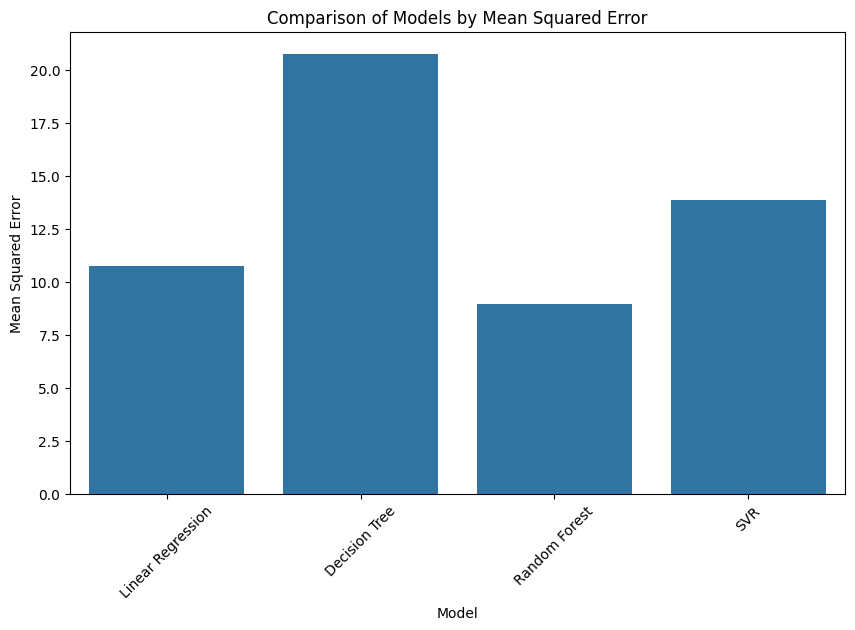

In [47]:
# Convert the MSE scores dictionary to a DataFrame
mse_df = pd.DataFrame(list(mse_scores.items()), columns=['Model', 'MSE'])

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', data=mse_df)
plt.title('Comparison of Models by Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.show()

For the default value of each machine learning models, **Random Forest** give the stand out to be the best model in this case with **MSE value 8.932**. The worst model is **Decision Tree** with **MSE value 20.7845**